In [2]:
import matplotlib.pyplot as plt 
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import numpy as np
import scipy
from mpmath import *
from numpy.random import multivariate_normal

# cu = 0.5

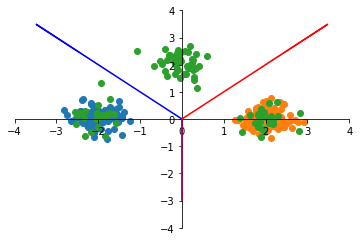

In [65]:
# define parameters
total_n = 300  # total number of samples = # class 1 + # class 2 + # sample class
cu = 0.5  # percentage of unknown unknonws in the test set
c = (1 - cu) / 2  # percentage of class 1 in the test set (= percentage of class 2 in the test set)

# define Gaussian distributions for class 1, 2 and unknown unknowns
mean_11, mean_12, mean_21, mean_22 = -2, 0, 2, 0
sigma_11, sigma_12, sigma_21, sigma_22 = 0.1, 0.1, 0.1, 0.1
mean_u1, mean_u2 = 0, 2
sigma_u1, sigma_u2 = 0.1, 0.1

# generate samples for class 1, class 2 and sample class
class1_x, class1_y = multivariate_normal([mean_11, mean_12], [[sigma_11, 0], [0, sigma_12]], 100).T
class2_x, class2_y = multivariate_normal([mean_21, mean_22], [[sigma_21, 0], [0, sigma_22]], 100).T
sample_x, sample_y = multivariate_normal([mean_u1, mean_u2], [[sigma_u1, 0], [0, sigma_u2]], int(100*cu)).T

s1_x, s1_y = multivariate_normal([mean_11, mean_12], [[sigma_11, 0], [0, sigma_12]], int(100*c)).T
s2_x, s2_y = multivariate_normal([mean_21, mean_22], [[sigma_21, 0], [0, sigma_22]], int(100*c)).T
sample_x, sample_y = np.concatenate((sample_x, s1_x)), np.concatenate((sample_y, s1_y))
sample_x, sample_y = np.concatenate((sample_x, s2_x)), np.concatenate((sample_y, s2_y))

# make plots
fig = plt.figure(1) 
ax = fig.add_subplot(111)

# set up axis 
ax.spines['left'].set_position('zero') 
ax.spines['right'].set_color('none') 
ax.spines['bottom'].set_position('zero') 
ax.spines['top'].set_color('none') 
ax.xaxis.set_ticks_position('bottom') 
ax.yaxis.set_ticks_position('left') 

# setup x and y ranges and precision
x1 = np.arange(-3.5, 3.5, 0.01) 
y1 = np.arange(-3.0, 3.5, 0.01)

x2 = np.arange(-3.5, 3.5, 0.01) 
y2 = np.arange(-3.0, 3.5, 0.01)

# draw the class distributions
ax.scatter(class1_x, class1_y)
ax.scatter(class2_x, class2_y)
ax.scatter(sample_x, sample_y)

# draw the decision boundary between class 1 and 2

# draw the decision boudary between class 1 and sample class
X1, Y1 = np.meshgrid(x1, y1)
F1 = (1-cu)/(2*sigma_21*sigma_22)*e**(-1/(2*sigma_21**2)*(X1-mean_21)**2-1/(2*sigma_22**2)*(Y1-mean_22)**2) \
    + cu/(sigma_u1*sigma_u2)*e**(-1/(2*sigma_u1**2)*(X1-mean_u1)**2-1/(2*sigma_u2**2)*(Y1-mean_u2)**2)
G1 = (1+cu)/(2*sigma_11*sigma_12)*e**(-1/(2*sigma_11**2)*(X1-mean_11)**2-1/(2*sigma_12**2)*(Y1-mean_12)**2)
ax.contour(X1, Y1, (F1-G1), [0], colors='blue', zorder=100)

# draw the decision boudary between class 2 and sample class
X2, Y2 = np.meshgrid(x2, y2)
F2 = (1-cu)/(2*sigma_11*sigma_12)*e**(-1/(2*sigma_11**2)*(X2-mean_11)**2-1/(2*sigma_12**2)*(Y2-mean_12)**2) \
    + cu/(sigma_u1*sigma_u2)*e**(-1/(2*sigma_u1**2)*(X2-mean_u1)**2-1/(2*sigma_u2**2)*(Y2-mean_u2)**2)
G2 = (1+cu)/(2*sigma_21*sigma_22)*e**(-1/(2*sigma_21**2)*(X2-mean_21)**2-1/(2*sigma_22**2)*(Y2-mean_22)**2)
ax.contour(X2, Y2, (F2-G2), [0], colors='red', zorder=100)

# set bounds 
ax.set_xbound(-4, 4)
ax.set_ybound(-4, 4) 

plt.show()

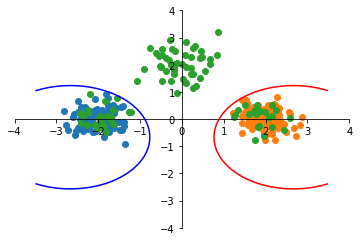

In [7]:
# define parameters
total_n = 300  # total number of samples = # class 1 + # class 2 + # sample class
cu = 0.5  # percentage of unknown unknonws in the test set
c = (1 - cu) / 2  # percentage of class 1 in the test set (= percentage of class 2 in the test set)

# define Gaussian distributions for class 1, 2 and unknown unknowns
mean_11, mean_12, mean_21, mean_22 = -2, 0, 2, 0
sigma_11, sigma_12, sigma_21, sigma_22 = 0.1, 0.1, 0.1, 0.1
mean_u1, mean_u2 = 0, 2
sigma_u1, sigma_u2 = 0.2, 0.2

# generate samples for class 1, class 2 and sample class
class1_x, class1_y = multivariate_normal([mean_11, mean_12], [[sigma_11, 0], [0, sigma_12]], 100).T
class2_x, class2_y = multivariate_normal([mean_21, mean_22], [[sigma_21, 0], [0, sigma_22]], 100).T
sample_x, sample_y = multivariate_normal([mean_u1, mean_u2], [[sigma_u1, 0], [0, sigma_u2]], int(100*cu)).T

s1_x, s1_y = multivariate_normal([mean_11, mean_12], [[sigma_11, 0], [0, sigma_12]], int(100*c)).T
s2_x, s2_y = multivariate_normal([mean_21, mean_22], [[sigma_21, 0], [0, sigma_22]], int(100*c)).T
sample_x, sample_y = np.concatenate((sample_x, s1_x)), np.concatenate((sample_y, s1_y))
sample_x, sample_y = np.concatenate((sample_x, s2_x)), np.concatenate((sample_y, s2_y))

# make plots
fig = plt.figure(1) 
ax = fig.add_subplot(111)

# set up axis 
ax.spines['left'].set_position('zero') 
ax.spines['right'].set_color('none') 
ax.spines['bottom'].set_position('zero') 
ax.spines['top'].set_color('none') 
ax.xaxis.set_ticks_position('bottom') 
ax.yaxis.set_ticks_position('left') 

# setup x and y ranges and precision
x1 = np.arange(-3.5, 3.5, 0.01) 
y1 = np.arange(-3.0, 3.5, 0.01)

x2 = np.arange(-3.5, 3.5, 0.01) 
y2 = np.arange(-3.0, 3.5, 0.01)

# draw the class distributions
ax.scatter(class1_x, class1_y)
ax.scatter(class2_x, class2_y)
ax.scatter(sample_x, sample_y)

# draw the decision boundary between class 1 and 2

# draw the decision boudary between class 1 and sample class
X1, Y1 = np.meshgrid(x1, y1)
F1 = (1-cu)/(2*sigma_21*sigma_22)*e**(-1/(2*sigma_21**2)*(X1-mean_21)**2-1/(2*sigma_22**2)*(Y1-mean_22)**2) \
    + cu/(sigma_u1*sigma_u2)*e**(-1/(2*sigma_u1**2)*(X1-mean_u1)**2-1/(2*sigma_u2**2)*(Y1-mean_u2)**2)
G1 = (1+cu)/(2*sigma_11*sigma_12)*e**(-1/(2*sigma_11**2)*(X1-mean_11)**2-1/(2*sigma_12**2)*(Y1-mean_12)**2)
ax.contour(X1, Y1, (F1-G1), [0], colors='blue', zorder=100)

# draw the decision boudary between class 2 and sample class
X2, Y2 = np.meshgrid(x2, y2)
F2 = (1-cu)/(2*sigma_11*sigma_12)*e**(-1/(2*sigma_11**2)*(X2-mean_11)**2-1/(2*sigma_12**2)*(Y2-mean_12)**2) \
    + cu/(sigma_u1*sigma_u2)*e**(-1/(2*sigma_u1**2)*(X2-mean_u1)**2-1/(2*sigma_u2**2)*(Y2-mean_u2)**2)
G2 = (1+cu)/(2*sigma_21*sigma_22)*e**(-1/(2*sigma_21**2)*(X2-mean_21)**2-1/(2*sigma_22**2)*(Y2-mean_22)**2)
ax.contour(X2, Y2, (F2-G2), [0], colors='red', zorder=100)

# set bounds 
ax.set_xbound(-4, 4)
ax.set_ybound(-4, 4) 

plt.show()

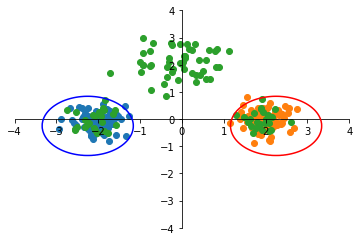

In [5]:
# define parameters
total_n = 300  # total number of samples = # class 1 + # class 2 + # sample class
cu = 0.5  # percentage of unknown unknonws in the test set
c = (1 - cu) / 2  # percentage of class 1 in the test set (= percentage of class 2 in the test set)

# define Gaussian distributions for class 1, 2 and unknown unknowns
mean_11, mean_12, mean_21, mean_22 = -2, 0, 2, 0
sigma_11, sigma_12, sigma_21, sigma_22 = 0.1, 0.1, 0.1, 0.1
mean_u1, mean_u2 = 0, 2
sigma_u1, sigma_u2 = 0.3, 0.3

# generate samples for class 1, class 2 and sample class
class1_x, class1_y = multivariate_normal([mean_11, mean_12], [[sigma_11, 0], [0, sigma_12]], 100).T
class2_x, class2_y = multivariate_normal([mean_21, mean_22], [[sigma_21, 0], [0, sigma_22]], 100).T
sample_x, sample_y = multivariate_normal([mean_u1, mean_u2], [[sigma_u1, 0], [0, sigma_u2]], int(100*cu)).T

s1_x, s1_y = multivariate_normal([mean_11, mean_12], [[sigma_11, 0], [0, sigma_12]], int(100*c)).T
s2_x, s2_y = multivariate_normal([mean_21, mean_22], [[sigma_21, 0], [0, sigma_22]], int(100*c)).T
sample_x, sample_y = np.concatenate((sample_x, s1_x)), np.concatenate((sample_y, s1_y))
sample_x, sample_y = np.concatenate((sample_x, s2_x)), np.concatenate((sample_y, s2_y))

# make plots
fig = plt.figure(1) 
ax = fig.add_subplot(111)

# set up axis 
ax.spines['left'].set_position('zero') 
ax.spines['right'].set_color('none') 
ax.spines['bottom'].set_position('zero') 
ax.spines['top'].set_color('none') 
ax.xaxis.set_ticks_position('bottom') 
ax.yaxis.set_ticks_position('left') 

# setup x and y ranges and precision
x1 = np.arange(-3.5, 3.5, 0.01) 
y1 = np.arange(-3.0, 3.5, 0.01)

x2 = np.arange(-3.5, 3.5, 0.01) 
y2 = np.arange(-3.0, 3.5, 0.01)

# draw the class distributions
ax.scatter(class1_x, class1_y)
ax.scatter(class2_x, class2_y)
ax.scatter(sample_x, sample_y)

# draw the decision boundary between class 1 and 2

# draw the decision boudary between class 1 and sample class
X1, Y1 = np.meshgrid(x1, y1)
F1 = (1-cu)/(2*sigma_21*sigma_22)*e**(-1/(2*sigma_21**2)*(X1-mean_21)**2-1/(2*sigma_22**2)*(Y1-mean_22)**2) \
    + cu/(sigma_u1*sigma_u2)*e**(-1/(2*sigma_u1**2)*(X1-mean_u1)**2-1/(2*sigma_u2**2)*(Y1-mean_u2)**2)
G1 = (1+cu)/(2*sigma_11*sigma_12)*e**(-1/(2*sigma_11**2)*(X1-mean_11)**2-1/(2*sigma_12**2)*(Y1-mean_12)**2)
ax.contour(X1, Y1, (F1-G1), [0], colors='blue', zorder=100)

# draw the decision boudary between class 2 and sample class
X2, Y2 = np.meshgrid(x2, y2)
F2 = (1-cu)/(2*sigma_11*sigma_12)*e**(-1/(2*sigma_11**2)*(X2-mean_11)**2-1/(2*sigma_12**2)*(Y2-mean_12)**2) \
    + cu/(sigma_u1*sigma_u2)*e**(-1/(2*sigma_u1**2)*(X2-mean_u1)**2-1/(2*sigma_u2**2)*(Y2-mean_u2)**2)
G2 = (1+cu)/(2*sigma_21*sigma_22)*e**(-1/(2*sigma_21**2)*(X2-mean_21)**2-1/(2*sigma_22**2)*(Y2-mean_22)**2)
ax.contour(X2, Y2, (F2-G2), [0], colors='red', zorder=100)

# set bounds 
ax.set_xbound(-4, 4)
ax.set_ybound(-4, 4) 

plt.show()

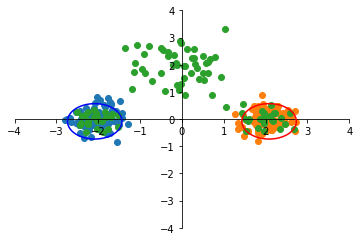

In [66]:
# define parameters
total_n = 300  # total number of samples = # class 1 + # class 2 + # sample class
cu = 0.5  # percentage of unknown unknonws in the test set
c = (1 - cu) / 2  # percentage of class 1 in the test set (= percentage of class 2 in the test set)

# define Gaussian distributions for class 1, 2 and unknown unknowns
mean_11, mean_12, mean_21, mean_22 = -2, 0, 2, 0
sigma_11, sigma_12, sigma_21, sigma_22 = 0.1, 0.1, 0.1, 0.1
mean_u1, mean_u2 = 0, 2
sigma_u1, sigma_u2 = 0.5, 0.5

# generate samples for class 1, class 2 and sample class
class1_x, class1_y = multivariate_normal([mean_11, mean_12], [[sigma_11, 0], [0, sigma_12]], 100).T
class2_x, class2_y = multivariate_normal([mean_21, mean_22], [[sigma_21, 0], [0, sigma_22]], 100).T
sample_x, sample_y = multivariate_normal([mean_u1, mean_u2], [[sigma_u1, 0], [0, sigma_u2]], int(100*cu)).T

s1_x, s1_y = multivariate_normal([mean_11, mean_12], [[sigma_11, 0], [0, sigma_12]], int(100*c)).T
s2_x, s2_y = multivariate_normal([mean_21, mean_22], [[sigma_21, 0], [0, sigma_22]], int(100*c)).T
sample_x, sample_y = np.concatenate((sample_x, s1_x)), np.concatenate((sample_y, s1_y))
sample_x, sample_y = np.concatenate((sample_x, s2_x)), np.concatenate((sample_y, s2_y))

# make plots
fig = plt.figure(1) 
ax = fig.add_subplot(111)

# set up axis 
ax.spines['left'].set_position('zero') 
ax.spines['right'].set_color('none') 
ax.spines['bottom'].set_position('zero') 
ax.spines['top'].set_color('none') 
ax.xaxis.set_ticks_position('bottom') 
ax.yaxis.set_ticks_position('left') 

# setup x and y ranges and precision
x1 = np.arange(-3.5, 3.5, 0.01) 
y1 = np.arange(-3.0, 3.5, 0.01)

x2 = np.arange(-3.5, 3.5, 0.01) 
y2 = np.arange(-3.0, 3.5, 0.01)

# draw the class distributions
ax.scatter(class1_x, class1_y)
ax.scatter(class2_x, class2_y)
ax.scatter(sample_x, sample_y)

# draw the decision boundary between class 1 and 2

# draw the decision boudary between class 1 and sample class
X1, Y1 = np.meshgrid(x1, y1)
F1 = (1-cu)/(2*sigma_21*sigma_22)*e**(-1/(2*sigma_21**2)*(X1-mean_21)**2-1/(2*sigma_22**2)*(Y1-mean_22)**2) \
    + cu/(sigma_u1*sigma_u2)*e**(-1/(2*sigma_u1**2)*(X1-mean_u1)**2-1/(2*sigma_u2**2)*(Y1-mean_u2)**2)
G1 = (1+cu)/(2*sigma_11*sigma_12)*e**(-1/(2*sigma_11**2)*(X1-mean_11)**2-1/(2*sigma_12**2)*(Y1-mean_12)**2)
ax.contour(X1, Y1, (F1-G1), [0], colors='blue', zorder=100)

# draw the decision boudary between class 2 and sample class
X2, Y2 = np.meshgrid(x2, y2)
F2 = (1-cu)/(2*sigma_11*sigma_12)*e**(-1/(2*sigma_11**2)*(X2-mean_11)**2-1/(2*sigma_12**2)*(Y2-mean_12)**2) \
    + cu/(sigma_u1*sigma_u2)*e**(-1/(2*sigma_u1**2)*(X2-mean_u1)**2-1/(2*sigma_u2**2)*(Y2-mean_u2)**2)
G2 = (1+cu)/(2*sigma_21*sigma_22)*e**(-1/(2*sigma_21**2)*(X2-mean_21)**2-1/(2*sigma_22**2)*(Y2-mean_22)**2)
ax.contour(X2, Y2, (F2-G2), [0], colors='red', zorder=100)

# set bounds 
ax.set_xbound(-4, 4)
ax.set_ybound(-4, 4) 

plt.show()

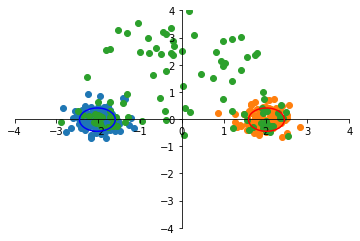

In [67]:
# define parameters
total_n = 300  # total number of samples = # class 1 + # class 2 + # sample class
cu = 0.5  # percentage of unknown unknonws in the test set
c = (1 - cu) / 2  # percentage of class 1 in the test set (= percentage of class 2 in the test set)

# define Gaussian distributions for class 1, 2 and unknown unknowns
mean_11, mean_12, mean_21, mean_22 = -2, 0, 2, 0
sigma_11, sigma_12, sigma_21, sigma_22 = 0.1, 0.1, 0.1, 0.1
mean_u1, mean_u2 = 0, 2
sigma_u1, sigma_u2 = 1, 1

# generate samples for class 1, class 2 and sample class
class1_x, class1_y = multivariate_normal([mean_11, mean_12], [[sigma_11, 0], [0, sigma_12]], 100).T
class2_x, class2_y = multivariate_normal([mean_21, mean_22], [[sigma_21, 0], [0, sigma_22]], 100).T
sample_x, sample_y = multivariate_normal([mean_u1, mean_u2], [[sigma_u1, 0], [0, sigma_u2]], int(100*cu)).T

s1_x, s1_y = multivariate_normal([mean_11, mean_12], [[sigma_11, 0], [0, sigma_12]], int(100*c)).T
s2_x, s2_y = multivariate_normal([mean_21, mean_22], [[sigma_21, 0], [0, sigma_22]], int(100*c)).T
sample_x, sample_y = np.concatenate((sample_x, s1_x)), np.concatenate((sample_y, s1_y))
sample_x, sample_y = np.concatenate((sample_x, s2_x)), np.concatenate((sample_y, s2_y))

# make plots
fig = plt.figure(1) 
ax = fig.add_subplot(111)

# set up axis 
ax.spines['left'].set_position('zero') 
ax.spines['right'].set_color('none') 
ax.spines['bottom'].set_position('zero') 
ax.spines['top'].set_color('none') 
ax.xaxis.set_ticks_position('bottom') 
ax.yaxis.set_ticks_position('left') 

# setup x and y ranges and precision
x1 = np.arange(-3.5, 3.5, 0.01) 
y1 = np.arange(-3.0, 3.5, 0.01)

x2 = np.arange(-3.5, 3.5, 0.01) 
y2 = np.arange(-3.0, 3.5, 0.01)

# draw the class distributions
ax.scatter(class1_x, class1_y)
ax.scatter(class2_x, class2_y)
ax.scatter(sample_x, sample_y)

# draw the decision boundary between class 1 and 2

# draw the decision boudary between class 1 and sample class
X1, Y1 = np.meshgrid(x1, y1)
F1 = (1-cu)/(2*sigma_21*sigma_22)*e**(-1/(2*sigma_21**2)*(X1-mean_21)**2-1/(2*sigma_22**2)*(Y1-mean_22)**2) \
    + cu/(sigma_u1*sigma_u2)*e**(-1/(2*sigma_u1**2)*(X1-mean_u1)**2-1/(2*sigma_u2**2)*(Y1-mean_u2)**2)
G1 = (1+cu)/(2*sigma_11*sigma_12)*e**(-1/(2*sigma_11**2)*(X1-mean_11)**2-1/(2*sigma_12**2)*(Y1-mean_12)**2)
ax.contour(X1, Y1, (F1-G1), [0], colors='blue', zorder=100)

# draw the decision boudary between class 2 and sample class
X2, Y2 = np.meshgrid(x2, y2)
F2 = (1-cu)/(2*sigma_11*sigma_12)*e**(-1/(2*sigma_11**2)*(X2-mean_11)**2-1/(2*sigma_12**2)*(Y2-mean_12)**2) \
    + cu/(sigma_u1*sigma_u2)*e**(-1/(2*sigma_u1**2)*(X2-mean_u1)**2-1/(2*sigma_u2**2)*(Y2-mean_u2)**2)
G2 = (1+cu)/(2*sigma_21*sigma_22)*e**(-1/(2*sigma_21**2)*(X2-mean_21)**2-1/(2*sigma_22**2)*(Y2-mean_22)**2)
ax.contour(X2, Y2, (F2-G2), [0], colors='red', zorder=100)

# set bounds 
ax.set_xbound(-4, 4)
ax.set_ybound(-4, 4) 

plt.show()

# cu = 0.3

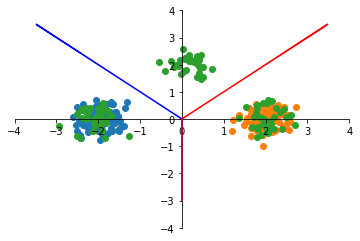

In [68]:
# define parameters
total_n = 300  # total number of samples = # class 1 + # class 2 + # sample class
cu = 0.3  # percentage of unknown unknonws in the test set
c = (1 - cu) / 2  # percentage of class 1 in the test set (= percentage of class 2 in the test set)

# define Gaussian distributions for class 1, 2 and unknown unknowns
mean_11, mean_12, mean_21, mean_22 = -2, 0, 2, 0
sigma_11, sigma_12, sigma_21, sigma_22 = 0.1, 0.1, 0.1, 0.1
mean_u1, mean_u2 = 0, 2
sigma_u1, sigma_u2 = 0.1, 0.1

# generate samples for class 1, class 2 and sample class
class1_x, class1_y = multivariate_normal([mean_11, mean_12], [[sigma_11, 0], [0, sigma_12]], 100).T
class2_x, class2_y = multivariate_normal([mean_21, mean_22], [[sigma_21, 0], [0, sigma_22]], 100).T
sample_x, sample_y = multivariate_normal([mean_u1, mean_u2], [[sigma_u1, 0], [0, sigma_u2]], int(100*cu)).T

s1_x, s1_y = multivariate_normal([mean_11, mean_12], [[sigma_11, 0], [0, sigma_12]], int(100*c)).T
s2_x, s2_y = multivariate_normal([mean_21, mean_22], [[sigma_21, 0], [0, sigma_22]], int(100*c)).T
sample_x, sample_y = np.concatenate((sample_x, s1_x)), np.concatenate((sample_y, s1_y))
sample_x, sample_y = np.concatenate((sample_x, s2_x)), np.concatenate((sample_y, s2_y))

# make plots
fig = plt.figure(1) 
ax = fig.add_subplot(111)

# set up axis 
ax.spines['left'].set_position('zero') 
ax.spines['right'].set_color('none') 
ax.spines['bottom'].set_position('zero') 
ax.spines['top'].set_color('none') 
ax.xaxis.set_ticks_position('bottom') 
ax.yaxis.set_ticks_position('left') 

# setup x and y ranges and precision
x1 = np.arange(-3.5, 3.5, 0.01) 
y1 = np.arange(-3.0, 3.5, 0.01)

x2 = np.arange(-3.5, 3.5, 0.01) 
y2 = np.arange(-3.0, 3.5, 0.01)

# draw the class distributions
ax.scatter(class1_x, class1_y)
ax.scatter(class2_x, class2_y)
ax.scatter(sample_x, sample_y)

# draw the decision boundary between class 1 and 2

# draw the decision boudary between class 1 and sample class
X1, Y1 = np.meshgrid(x1, y1)
F1 = (1-cu)/(2*sigma_21*sigma_22)*e**(-1/(2*sigma_21**2)*(X1-mean_21)**2-1/(2*sigma_22**2)*(Y1-mean_22)**2) \
    + cu/(sigma_u1*sigma_u2)*e**(-1/(2*sigma_u1**2)*(X1-mean_u1)**2-1/(2*sigma_u2**2)*(Y1-mean_u2)**2)
G1 = (1+cu)/(2*sigma_11*sigma_12)*e**(-1/(2*sigma_11**2)*(X1-mean_11)**2-1/(2*sigma_12**2)*(Y1-mean_12)**2)
ax.contour(X1, Y1, (F1-G1), [0], colors='blue', zorder=100)

# draw the decision boudary between class 2 and sample class
X2, Y2 = np.meshgrid(x2, y2)
F2 = (1-cu)/(2*sigma_11*sigma_12)*e**(-1/(2*sigma_11**2)*(X2-mean_11)**2-1/(2*sigma_12**2)*(Y2-mean_12)**2) \
    + cu/(sigma_u1*sigma_u2)*e**(-1/(2*sigma_u1**2)*(X2-mean_u1)**2-1/(2*sigma_u2**2)*(Y2-mean_u2)**2)
G2 = (1+cu)/(2*sigma_21*sigma_22)*e**(-1/(2*sigma_21**2)*(X2-mean_21)**2-1/(2*sigma_22**2)*(Y2-mean_22)**2)
ax.contour(X2, Y2, (F2-G2), [0], colors='red', zorder=100)

# set bounds 
ax.set_xbound(-4, 4)
ax.set_ybound(-4, 4) 

plt.show()

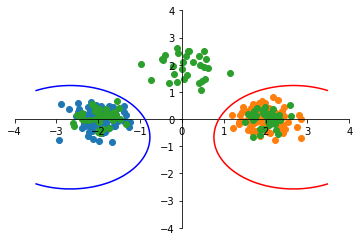

In [8]:
# define parameters
total_n = 300  # total number of samples = # class 1 + # class 2 + # sample class
cu = 0.3  # percentage of unknown unknonws in the test set
c = (1 - cu) / 2  # percentage of class 1 in the test set (= percentage of class 2 in the test set)

# define Gaussian distributions for class 1, 2 and unknown unknowns
mean_11, mean_12, mean_21, mean_22 = -2, 0, 2, 0
sigma_11, sigma_12, sigma_21, sigma_22 = 0.1, 0.1, 0.1, 0.1
mean_u1, mean_u2 = 0, 2
sigma_u1, sigma_u2 = 0.2, 0.2

# generate samples for class 1, class 2 and sample class
class1_x, class1_y = multivariate_normal([mean_11, mean_12], [[sigma_11, 0], [0, sigma_12]], 100).T
class2_x, class2_y = multivariate_normal([mean_21, mean_22], [[sigma_21, 0], [0, sigma_22]], 100).T
sample_x, sample_y = multivariate_normal([mean_u1, mean_u2], [[sigma_u1, 0], [0, sigma_u2]], int(100*cu)).T

s1_x, s1_y = multivariate_normal([mean_11, mean_12], [[sigma_11, 0], [0, sigma_12]], int(100*c)).T
s2_x, s2_y = multivariate_normal([mean_21, mean_22], [[sigma_21, 0], [0, sigma_22]], int(100*c)).T
sample_x, sample_y = np.concatenate((sample_x, s1_x)), np.concatenate((sample_y, s1_y))
sample_x, sample_y = np.concatenate((sample_x, s2_x)), np.concatenate((sample_y, s2_y))

# make plots
fig = plt.figure(1) 
ax = fig.add_subplot(111)

# set up axis 
ax.spines['left'].set_position('zero') 
ax.spines['right'].set_color('none') 
ax.spines['bottom'].set_position('zero') 
ax.spines['top'].set_color('none') 
ax.xaxis.set_ticks_position('bottom') 
ax.yaxis.set_ticks_position('left') 

# setup x and y ranges and precision
x1 = np.arange(-3.5, 3.5, 0.01) 
y1 = np.arange(-3.0, 3.5, 0.01)

x2 = np.arange(-3.5, 3.5, 0.01) 
y2 = np.arange(-3.0, 3.5, 0.01)

# draw the class distributions
ax.scatter(class1_x, class1_y)
ax.scatter(class2_x, class2_y)
ax.scatter(sample_x, sample_y)

# draw the decision boundary between class 1 and 2

# draw the decision boudary between class 1 and sample class
X1, Y1 = np.meshgrid(x1, y1)
F1 = (1-cu)/(2*sigma_21*sigma_22)*e**(-1/(2*sigma_21**2)*(X1-mean_21)**2-1/(2*sigma_22**2)*(Y1-mean_22)**2) \
    + cu/(sigma_u1*sigma_u2)*e**(-1/(2*sigma_u1**2)*(X1-mean_u1)**2-1/(2*sigma_u2**2)*(Y1-mean_u2)**2)
G1 = (1+cu)/(2*sigma_11*sigma_12)*e**(-1/(2*sigma_11**2)*(X1-mean_11)**2-1/(2*sigma_12**2)*(Y1-mean_12)**2)
ax.contour(X1, Y1, (F1-G1), [0], colors='blue', zorder=100)

# draw the decision boudary between class 2 and sample class
X2, Y2 = np.meshgrid(x2, y2)
F2 = (1-cu)/(2*sigma_11*sigma_12)*e**(-1/(2*sigma_11**2)*(X2-mean_11)**2-1/(2*sigma_12**2)*(Y2-mean_12)**2) \
    + cu/(sigma_u1*sigma_u2)*e**(-1/(2*sigma_u1**2)*(X2-mean_u1)**2-1/(2*sigma_u2**2)*(Y2-mean_u2)**2)
G2 = (1+cu)/(2*sigma_21*sigma_22)*e**(-1/(2*sigma_21**2)*(X2-mean_21)**2-1/(2*sigma_22**2)*(Y2-mean_22)**2)
ax.contour(X2, Y2, (F2-G2), [0], colors='red', zorder=100)

# set bounds 
ax.set_xbound(-4, 4)
ax.set_ybound(-4, 4) 

plt.show()

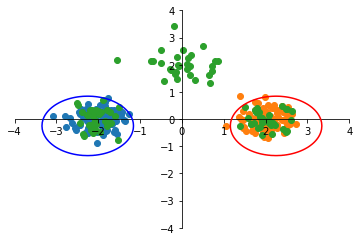

In [9]:
# define parameters
total_n = 300  # total number of samples = # class 1 + # class 2 + # sample class
cu = 0.3  # percentage of unknown unknonws in the test set
c = (1 - cu) / 2  # percentage of class 1 in the test set (= percentage of class 2 in the test set)

# define Gaussian distributions for class 1, 2 and unknown unknowns
mean_11, mean_12, mean_21, mean_22 = -2, 0, 2, 0
sigma_11, sigma_12, sigma_21, sigma_22 = 0.1, 0.1, 0.1, 0.1
mean_u1, mean_u2 = 0, 2
sigma_u1, sigma_u2 = 0.3, 0.3

# generate samples for class 1, class 2 and sample class
class1_x, class1_y = multivariate_normal([mean_11, mean_12], [[sigma_11, 0], [0, sigma_12]], 100).T
class2_x, class2_y = multivariate_normal([mean_21, mean_22], [[sigma_21, 0], [0, sigma_22]], 100).T
sample_x, sample_y = multivariate_normal([mean_u1, mean_u2], [[sigma_u1, 0], [0, sigma_u2]], int(100*cu)).T

s1_x, s1_y = multivariate_normal([mean_11, mean_12], [[sigma_11, 0], [0, sigma_12]], int(100*c)).T
s2_x, s2_y = multivariate_normal([mean_21, mean_22], [[sigma_21, 0], [0, sigma_22]], int(100*c)).T
sample_x, sample_y = np.concatenate((sample_x, s1_x)), np.concatenate((sample_y, s1_y))
sample_x, sample_y = np.concatenate((sample_x, s2_x)), np.concatenate((sample_y, s2_y))

# make plots
fig = plt.figure(1) 
ax = fig.add_subplot(111)

# set up axis 
ax.spines['left'].set_position('zero') 
ax.spines['right'].set_color('none') 
ax.spines['bottom'].set_position('zero') 
ax.spines['top'].set_color('none') 
ax.xaxis.set_ticks_position('bottom') 
ax.yaxis.set_ticks_position('left') 

# setup x and y ranges and precision
x1 = np.arange(-3.5, 3.5, 0.01) 
y1 = np.arange(-3.0, 3.5, 0.01)

x2 = np.arange(-3.5, 3.5, 0.01) 
y2 = np.arange(-3.0, 3.5, 0.01)

# draw the class distributions
ax.scatter(class1_x, class1_y)
ax.scatter(class2_x, class2_y)
ax.scatter(sample_x, sample_y)

# draw the decision boundary between class 1 and 2

# draw the decision boudary between class 1 and sample class
X1, Y1 = np.meshgrid(x1, y1)
F1 = (1-cu)/(2*sigma_21*sigma_22)*e**(-1/(2*sigma_21**2)*(X1-mean_21)**2-1/(2*sigma_22**2)*(Y1-mean_22)**2) \
    + cu/(sigma_u1*sigma_u2)*e**(-1/(2*sigma_u1**2)*(X1-mean_u1)**2-1/(2*sigma_u2**2)*(Y1-mean_u2)**2)
G1 = (1+cu)/(2*sigma_11*sigma_12)*e**(-1/(2*sigma_11**2)*(X1-mean_11)**2-1/(2*sigma_12**2)*(Y1-mean_12)**2)
ax.contour(X1, Y1, (F1-G1), [0], colors='blue', zorder=100)

# draw the decision boudary between class 2 and sample class
X2, Y2 = np.meshgrid(x2, y2)
F2 = (1-cu)/(2*sigma_11*sigma_12)*e**(-1/(2*sigma_11**2)*(X2-mean_11)**2-1/(2*sigma_12**2)*(Y2-mean_12)**2) \
    + cu/(sigma_u1*sigma_u2)*e**(-1/(2*sigma_u1**2)*(X2-mean_u1)**2-1/(2*sigma_u2**2)*(Y2-mean_u2)**2)
G2 = (1+cu)/(2*sigma_21*sigma_22)*e**(-1/(2*sigma_21**2)*(X2-mean_21)**2-1/(2*sigma_22**2)*(Y2-mean_22)**2)
ax.contour(X2, Y2, (F2-G2), [0], colors='red', zorder=100)

# set bounds 
ax.set_xbound(-4, 4)
ax.set_ybound(-4, 4) 

plt.show()

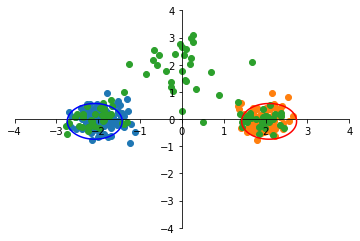

In [69]:
# define parameters
total_n = 300  # total number of samples = # class 1 + # class 2 + # sample class
cu = 0.3  # percentage of unknown unknonws in the test set
c = (1 - cu) / 2  # percentage of class 1 in the test set (= percentage of class 2 in the test set)

# define Gaussian distributions for class 1, 2 and unknown unknowns
mean_11, mean_12, mean_21, mean_22 = -2, 0, 2, 0
sigma_11, sigma_12, sigma_21, sigma_22 = 0.1, 0.1, 0.1, 0.1
mean_u1, mean_u2 = 0, 2
sigma_u1, sigma_u2 = 0.5, 0.5

# generate samples for class 1, class 2 and sample class
class1_x, class1_y = multivariate_normal([mean_11, mean_12], [[sigma_11, 0], [0, sigma_12]], 100).T
class2_x, class2_y = multivariate_normal([mean_21, mean_22], [[sigma_21, 0], [0, sigma_22]], 100).T
sample_x, sample_y = multivariate_normal([mean_u1, mean_u2], [[sigma_u1, 0], [0, sigma_u2]], int(100*cu)).T

s1_x, s1_y = multivariate_normal([mean_11, mean_12], [[sigma_11, 0], [0, sigma_12]], int(100*c)).T
s2_x, s2_y = multivariate_normal([mean_21, mean_22], [[sigma_21, 0], [0, sigma_22]], int(100*c)).T
sample_x, sample_y = np.concatenate((sample_x, s1_x)), np.concatenate((sample_y, s1_y))
sample_x, sample_y = np.concatenate((sample_x, s2_x)), np.concatenate((sample_y, s2_y))

# make plots
fig = plt.figure(1) 
ax = fig.add_subplot(111)

# set up axis 
ax.spines['left'].set_position('zero') 
ax.spines['right'].set_color('none') 
ax.spines['bottom'].set_position('zero') 
ax.spines['top'].set_color('none') 
ax.xaxis.set_ticks_position('bottom') 
ax.yaxis.set_ticks_position('left') 

# setup x and y ranges and precision
x1 = np.arange(-3.5, 3.5, 0.01) 
y1 = np.arange(-3.0, 3.5, 0.01)

x2 = np.arange(-3.5, 3.5, 0.01) 
y2 = np.arange(-3.0, 3.5, 0.01)

# draw the class distributions
ax.scatter(class1_x, class1_y)
ax.scatter(class2_x, class2_y)
ax.scatter(sample_x, sample_y)

# draw the decision boundary between class 1 and 2

# draw the decision boudary between class 1 and sample class
X1, Y1 = np.meshgrid(x1, y1)
F1 = (1-cu)/(2*sigma_21*sigma_22)*e**(-1/(2*sigma_21**2)*(X1-mean_21)**2-1/(2*sigma_22**2)*(Y1-mean_22)**2) \
    + cu/(sigma_u1*sigma_u2)*e**(-1/(2*sigma_u1**2)*(X1-mean_u1)**2-1/(2*sigma_u2**2)*(Y1-mean_u2)**2)
G1 = (1+cu)/(2*sigma_11*sigma_12)*e**(-1/(2*sigma_11**2)*(X1-mean_11)**2-1/(2*sigma_12**2)*(Y1-mean_12)**2)
ax.contour(X1, Y1, (F1-G1), [0], colors='blue', zorder=100)

# draw the decision boudary between class 2 and sample class
X2, Y2 = np.meshgrid(x2, y2)
F2 = (1-cu)/(2*sigma_11*sigma_12)*e**(-1/(2*sigma_11**2)*(X2-mean_11)**2-1/(2*sigma_12**2)*(Y2-mean_12)**2) \
    + cu/(sigma_u1*sigma_u2)*e**(-1/(2*sigma_u1**2)*(X2-mean_u1)**2-1/(2*sigma_u2**2)*(Y2-mean_u2)**2)
G2 = (1+cu)/(2*sigma_21*sigma_22)*e**(-1/(2*sigma_21**2)*(X2-mean_21)**2-1/(2*sigma_22**2)*(Y2-mean_22)**2)
ax.contour(X2, Y2, (F2-G2), [0], colors='red', zorder=100)

# set bounds 
ax.set_xbound(-4, 4)
ax.set_ybound(-4, 4) 

plt.show()

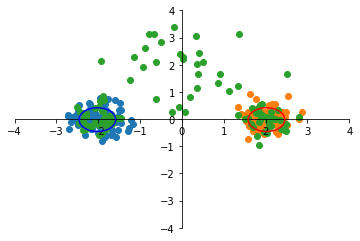

In [70]:
# define parameters
total_n = 300  # total number of samples = # class 1 + # class 2 + # sample class
cu = 0.3  # percentage of unknown unknonws in the test set
c = (1 - cu) / 2  # percentage of class 1 in the test set (= percentage of class 2 in the test set)

# define Gaussian distributions for class 1, 2 and unknown unknowns
mean_11, mean_12, mean_21, mean_22 = -2, 0, 2, 0
sigma_11, sigma_12, sigma_21, sigma_22 = 0.1, 0.1, 0.1, 0.1
mean_u1, mean_u2 = 0, 2
sigma_u1, sigma_u2 = 1, 1

# generate samples for class 1, class 2 and sample class
class1_x, class1_y = multivariate_normal([mean_11, mean_12], [[sigma_11, 0], [0, sigma_12]], 100).T
class2_x, class2_y = multivariate_normal([mean_21, mean_22], [[sigma_21, 0], [0, sigma_22]], 100).T
sample_x, sample_y = multivariate_normal([mean_u1, mean_u2], [[sigma_u1, 0], [0, sigma_u2]], int(100*cu)).T

s1_x, s1_y = multivariate_normal([mean_11, mean_12], [[sigma_11, 0], [0, sigma_12]], int(100*c)).T
s2_x, s2_y = multivariate_normal([mean_21, mean_22], [[sigma_21, 0], [0, sigma_22]], int(100*c)).T
sample_x, sample_y = np.concatenate((sample_x, s1_x)), np.concatenate((sample_y, s1_y))
sample_x, sample_y = np.concatenate((sample_x, s2_x)), np.concatenate((sample_y, s2_y))

# make plots
fig = plt.figure(1) 
ax = fig.add_subplot(111)

# set up axis 
ax.spines['left'].set_position('zero') 
ax.spines['right'].set_color('none') 
ax.spines['bottom'].set_position('zero') 
ax.spines['top'].set_color('none') 
ax.xaxis.set_ticks_position('bottom') 
ax.yaxis.set_ticks_position('left') 

# setup x and y ranges and precision
x1 = np.arange(-3.5, 3.5, 0.01) 
y1 = np.arange(-3.0, 3.5, 0.01)

x2 = np.arange(-3.5, 3.5, 0.01) 
y2 = np.arange(-3.0, 3.5, 0.01)

# draw the class distributions
ax.scatter(class1_x, class1_y)
ax.scatter(class2_x, class2_y)
ax.scatter(sample_x, sample_y)

# draw the decision boundary between class 1 and 2

# draw the decision boudary between class 1 and sample class
X1, Y1 = np.meshgrid(x1, y1)
F1 = (1-cu)/(2*sigma_21*sigma_22)*e**(-1/(2*sigma_21**2)*(X1-mean_21)**2-1/(2*sigma_22**2)*(Y1-mean_22)**2) \
    + cu/(sigma_u1*sigma_u2)*e**(-1/(2*sigma_u1**2)*(X1-mean_u1)**2-1/(2*sigma_u2**2)*(Y1-mean_u2)**2)
G1 = (1+cu)/(2*sigma_11*sigma_12)*e**(-1/(2*sigma_11**2)*(X1-mean_11)**2-1/(2*sigma_12**2)*(Y1-mean_12)**2)
ax.contour(X1, Y1, (F1-G1), [0], colors='blue', zorder=100)

# draw the decision boudary between class 2 and sample class
X2, Y2 = np.meshgrid(x2, y2)
F2 = (1-cu)/(2*sigma_11*sigma_12)*e**(-1/(2*sigma_11**2)*(X2-mean_11)**2-1/(2*sigma_12**2)*(Y2-mean_12)**2) \
    + cu/(sigma_u1*sigma_u2)*e**(-1/(2*sigma_u1**2)*(X2-mean_u1)**2-1/(2*sigma_u2**2)*(Y2-mean_u2)**2)
G2 = (1+cu)/(2*sigma_21*sigma_22)*e**(-1/(2*sigma_21**2)*(X2-mean_21)**2-1/(2*sigma_22**2)*(Y2-mean_22)**2)
ax.contour(X2, Y2, (F2-G2), [0], colors='red', zorder=100)

# set bounds 
ax.set_xbound(-4, 4)
ax.set_ybound(-4, 4) 

plt.show()

# cu = 0.1

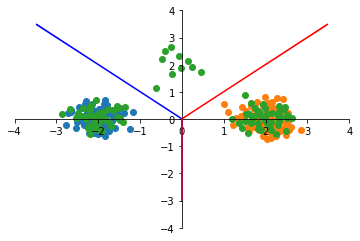

In [3]:
# define parameters
total_n = 300  # total number of samples = # class 1 + # class 2 + # sample class
cu = 0.1  # percentage of unknown unknonws in the test set
c = (1 - cu) / 2  # percentage of class 1 in the test set (= percentage of class 2 in the test set)

# define Gaussian distributions for class 1, 2 and unknown unknowns
mean_11, mean_12, mean_21, mean_22 = -2, 0, 2, 0
sigma_11, sigma_12, sigma_21, sigma_22 = 0.1, 0.1, 0.1, 0.1
mean_u1, mean_u2 = 0, 2
sigma_u1, sigma_u2 = 0.1, 0.1

# generate samples for class 1, class 2 and sample class
class1_x, class1_y = multivariate_normal([mean_11, mean_12], [[sigma_11, 0], [0, sigma_12]], 100).T
class2_x, class2_y = multivariate_normal([mean_21, mean_22], [[sigma_21, 0], [0, sigma_22]], 100).T
sample_x, sample_y = multivariate_normal([mean_u1, mean_u2], [[sigma_u1, 0], [0, sigma_u2]], int(100*cu)).T

s1_x, s1_y = multivariate_normal([mean_11, mean_12], [[sigma_11, 0], [0, sigma_12]], int(100*c)).T
s2_x, s2_y = multivariate_normal([mean_21, mean_22], [[sigma_21, 0], [0, sigma_22]], int(100*c)).T
sample_x, sample_y = np.concatenate((sample_x, s1_x)), np.concatenate((sample_y, s1_y))
sample_x, sample_y = np.concatenate((sample_x, s2_x)), np.concatenate((sample_y, s2_y))

# make plots
fig = plt.figure(1) 
ax = fig.add_subplot(111)

# set up axis 
ax.spines['left'].set_position('zero') 
ax.spines['right'].set_color('none') 
ax.spines['bottom'].set_position('zero') 
ax.spines['top'].set_color('none') 
ax.xaxis.set_ticks_position('bottom') 
ax.yaxis.set_ticks_position('left') 

# setup x and y ranges and precision
x1 = np.arange(-3.5, 3.5, 0.01) 
y1 = np.arange(-3.0, 3.5, 0.01)

x2 = np.arange(-3.5, 3.5, 0.01) 
y2 = np.arange(-3.0, 3.5, 0.01)

# draw the class distributions
ax.scatter(class1_x, class1_y)
ax.scatter(class2_x, class2_y)
ax.scatter(sample_x, sample_y)

# draw the decision boundary between class 1 and 2

# draw the decision boudary between class 1 and sample class
X1, Y1 = np.meshgrid(x1, y1)
F1 = (1-cu)/(2*sigma_21*sigma_22)*e**(-1/(2*sigma_21**2)*(X1-mean_21)**2-1/(2*sigma_22**2)*(Y1-mean_22)**2) \
    + cu/(sigma_u1*sigma_u2)*e**(-1/(2*sigma_u1**2)*(X1-mean_u1)**2-1/(2*sigma_u2**2)*(Y1-mean_u2)**2)
G1 = (1+cu)/(2*sigma_11*sigma_12)*e**(-1/(2*sigma_11**2)*(X1-mean_11)**2-1/(2*sigma_12**2)*(Y1-mean_12)**2)
ax.contour(X1, Y1, (F1-G1), [0], colors='blue', zorder=100)

# draw the decision boudary between class 2 and sample class
X2, Y2 = np.meshgrid(x2, y2)
F2 = (1-cu)/(2*sigma_11*sigma_12)*e**(-1/(2*sigma_11**2)*(X2-mean_11)**2-1/(2*sigma_12**2)*(Y2-mean_12)**2) \
    + cu/(sigma_u1*sigma_u2)*e**(-1/(2*sigma_u1**2)*(X2-mean_u1)**2-1/(2*sigma_u2**2)*(Y2-mean_u2)**2)
G2 = (1+cu)/(2*sigma_21*sigma_22)*e**(-1/(2*sigma_21**2)*(X2-mean_21)**2-1/(2*sigma_22**2)*(Y2-mean_22)**2)
ax.contour(X2, Y2, (F2-G2), [0], colors='red', zorder=100)

# set bounds 
ax.set_xbound(-4, 4)
ax.set_ybound(-4, 4) 

plt.show()

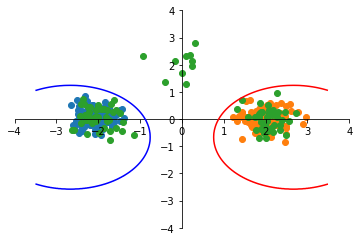

In [10]:
# define parameters
total_n = 300  # total number of samples = # class 1 + # class 2 + # sample class
cu = 0.1  # percentage of unknown unknonws in the test set
c = (1 - cu) / 2  # percentage of class 1 in the test set (= percentage of class 2 in the test set)

# define Gaussian distributions for class 1, 2 and unknown unknowns
mean_11, mean_12, mean_21, mean_22 = -2, 0, 2, 0
sigma_11, sigma_12, sigma_21, sigma_22 = 0.1, 0.1, 0.1, 0.1
mean_u1, mean_u2 = 0, 2
sigma_u1, sigma_u2 = 0.2, 0.2

# generate samples for class 1, class 2 and sample class
class1_x, class1_y = multivariate_normal([mean_11, mean_12], [[sigma_11, 0], [0, sigma_12]], 100).T
class2_x, class2_y = multivariate_normal([mean_21, mean_22], [[sigma_21, 0], [0, sigma_22]], 100).T
sample_x, sample_y = multivariate_normal([mean_u1, mean_u2], [[sigma_u1, 0], [0, sigma_u2]], int(100*cu)).T

s1_x, s1_y = multivariate_normal([mean_11, mean_12], [[sigma_11, 0], [0, sigma_12]], int(100*c)).T
s2_x, s2_y = multivariate_normal([mean_21, mean_22], [[sigma_21, 0], [0, sigma_22]], int(100*c)).T
sample_x, sample_y = np.concatenate((sample_x, s1_x)), np.concatenate((sample_y, s1_y))
sample_x, sample_y = np.concatenate((sample_x, s2_x)), np.concatenate((sample_y, s2_y))

# make plots
fig = plt.figure(1) 
ax = fig.add_subplot(111)

# set up axis 
ax.spines['left'].set_position('zero') 
ax.spines['right'].set_color('none') 
ax.spines['bottom'].set_position('zero') 
ax.spines['top'].set_color('none') 
ax.xaxis.set_ticks_position('bottom') 
ax.yaxis.set_ticks_position('left') 

# setup x and y ranges and precision
x1 = np.arange(-3.5, 3.5, 0.01) 
y1 = np.arange(-3.0, 3.5, 0.01)

x2 = np.arange(-3.5, 3.5, 0.01) 
y2 = np.arange(-3.0, 3.5, 0.01)

# draw the class distributions
ax.scatter(class1_x, class1_y)
ax.scatter(class2_x, class2_y)
ax.scatter(sample_x, sample_y)

# draw the decision boundary between class 1 and 2

# draw the decision boudary between class 1 and sample class
X1, Y1 = np.meshgrid(x1, y1)
F1 = (1-cu)/(2*sigma_21*sigma_22)*e**(-1/(2*sigma_21**2)*(X1-mean_21)**2-1/(2*sigma_22**2)*(Y1-mean_22)**2) \
    + cu/(sigma_u1*sigma_u2)*e**(-1/(2*sigma_u1**2)*(X1-mean_u1)**2-1/(2*sigma_u2**2)*(Y1-mean_u2)**2)
G1 = (1+cu)/(2*sigma_11*sigma_12)*e**(-1/(2*sigma_11**2)*(X1-mean_11)**2-1/(2*sigma_12**2)*(Y1-mean_12)**2)
ax.contour(X1, Y1, (F1-G1), [0], colors='blue', zorder=100)

# draw the decision boudary between class 2 and sample class
X2, Y2 = np.meshgrid(x2, y2)
F2 = (1-cu)/(2*sigma_11*sigma_12)*e**(-1/(2*sigma_11**2)*(X2-mean_11)**2-1/(2*sigma_12**2)*(Y2-mean_12)**2) \
    + cu/(sigma_u1*sigma_u2)*e**(-1/(2*sigma_u1**2)*(X2-mean_u1)**2-1/(2*sigma_u2**2)*(Y2-mean_u2)**2)
G2 = (1+cu)/(2*sigma_21*sigma_22)*e**(-1/(2*sigma_21**2)*(X2-mean_21)**2-1/(2*sigma_22**2)*(Y2-mean_22)**2)
ax.contour(X2, Y2, (F2-G2), [0], colors='red', zorder=100)

# set bounds 
ax.set_xbound(-4, 4)
ax.set_ybound(-4, 4) 

plt.show()

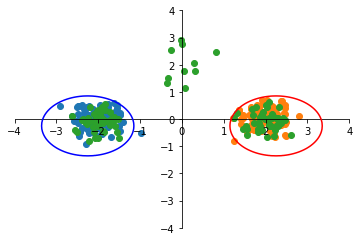

In [11]:
# define parameters
total_n = 300  # total number of samples = # class 1 + # class 2 + # sample class
cu = 0.1  # percentage of unknown unknonws in the test set
c = (1 - cu) / 2  # percentage of class 1 in the test set (= percentage of class 2 in the test set)

# define Gaussian distributions for class 1, 2 and unknown unknowns
mean_11, mean_12, mean_21, mean_22 = -2, 0, 2, 0
sigma_11, sigma_12, sigma_21, sigma_22 = 0.1, 0.1, 0.1, 0.1
mean_u1, mean_u2 = 0, 2
sigma_u1, sigma_u2 = 0.3, 0.3

# generate samples for class 1, class 2 and sample class
class1_x, class1_y = multivariate_normal([mean_11, mean_12], [[sigma_11, 0], [0, sigma_12]], 100).T
class2_x, class2_y = multivariate_normal([mean_21, mean_22], [[sigma_21, 0], [0, sigma_22]], 100).T
sample_x, sample_y = multivariate_normal([mean_u1, mean_u2], [[sigma_u1, 0], [0, sigma_u2]], int(100*cu)).T

s1_x, s1_y = multivariate_normal([mean_11, mean_12], [[sigma_11, 0], [0, sigma_12]], int(100*c)).T
s2_x, s2_y = multivariate_normal([mean_21, mean_22], [[sigma_21, 0], [0, sigma_22]], int(100*c)).T
sample_x, sample_y = np.concatenate((sample_x, s1_x)), np.concatenate((sample_y, s1_y))
sample_x, sample_y = np.concatenate((sample_x, s2_x)), np.concatenate((sample_y, s2_y))

# make plots
fig = plt.figure(1) 
ax = fig.add_subplot(111)

# set up axis 
ax.spines['left'].set_position('zero') 
ax.spines['right'].set_color('none') 
ax.spines['bottom'].set_position('zero') 
ax.spines['top'].set_color('none') 
ax.xaxis.set_ticks_position('bottom') 
ax.yaxis.set_ticks_position('left') 

# setup x and y ranges and precision
x1 = np.arange(-3.5, 3.5, 0.01) 
y1 = np.arange(-3.0, 3.5, 0.01)

x2 = np.arange(-3.5, 3.5, 0.01) 
y2 = np.arange(-3.0, 3.5, 0.01)

# draw the class distributions
ax.scatter(class1_x, class1_y)
ax.scatter(class2_x, class2_y)
ax.scatter(sample_x, sample_y)

# draw the decision boundary between class 1 and 2

# draw the decision boudary between class 1 and sample class
X1, Y1 = np.meshgrid(x1, y1)
F1 = (1-cu)/(2*sigma_21*sigma_22)*e**(-1/(2*sigma_21**2)*(X1-mean_21)**2-1/(2*sigma_22**2)*(Y1-mean_22)**2) \
    + cu/(sigma_u1*sigma_u2)*e**(-1/(2*sigma_u1**2)*(X1-mean_u1)**2-1/(2*sigma_u2**2)*(Y1-mean_u2)**2)
G1 = (1+cu)/(2*sigma_11*sigma_12)*e**(-1/(2*sigma_11**2)*(X1-mean_11)**2-1/(2*sigma_12**2)*(Y1-mean_12)**2)
ax.contour(X1, Y1, (F1-G1), [0], colors='blue', zorder=100)

# draw the decision boudary between class 2 and sample class
X2, Y2 = np.meshgrid(x2, y2)
F2 = (1-cu)/(2*sigma_11*sigma_12)*e**(-1/(2*sigma_11**2)*(X2-mean_11)**2-1/(2*sigma_12**2)*(Y2-mean_12)**2) \
    + cu/(sigma_u1*sigma_u2)*e**(-1/(2*sigma_u1**2)*(X2-mean_u1)**2-1/(2*sigma_u2**2)*(Y2-mean_u2)**2)
G2 = (1+cu)/(2*sigma_21*sigma_22)*e**(-1/(2*sigma_21**2)*(X2-mean_21)**2-1/(2*sigma_22**2)*(Y2-mean_22)**2)
ax.contour(X2, Y2, (F2-G2), [0], colors='red', zorder=100)

# set bounds 
ax.set_xbound(-4, 4)
ax.set_ybound(-4, 4) 

plt.show()

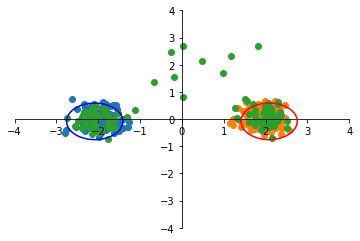

In [4]:
# define parameters
total_n = 300  # total number of samples = # class 1 + # class 2 + # sample class
cu = 0.1  # percentage of unknown unknonws in the test set
c = (1 - cu) / 2  # percentage of class 1 in the test set (= percentage of class 2 in the test set)

# define Gaussian distributions for class 1, 2 and unknown unknowns
mean_11, mean_12, mean_21, mean_22 = -2, 0, 2, 0
sigma_11, sigma_12, sigma_21, sigma_22 = 0.1, 0.1, 0.1, 0.1
mean_u1, mean_u2 = 0, 2
sigma_u1, sigma_u2 = 0.5, 0.5

# generate samples for class 1, class 2 and sample class
class1_x, class1_y = multivariate_normal([mean_11, mean_12], [[sigma_11, 0], [0, sigma_12]], 100).T
class2_x, class2_y = multivariate_normal([mean_21, mean_22], [[sigma_21, 0], [0, sigma_22]], 100).T
sample_x, sample_y = multivariate_normal([mean_u1, mean_u2], [[sigma_u1, 0], [0, sigma_u2]], int(100*cu)).T

s1_x, s1_y = multivariate_normal([mean_11, mean_12], [[sigma_11, 0], [0, sigma_12]], int(100*c)).T
s2_x, s2_y = multivariate_normal([mean_21, mean_22], [[sigma_21, 0], [0, sigma_22]], int(100*c)).T
sample_x, sample_y = np.concatenate((sample_x, s1_x)), np.concatenate((sample_y, s1_y))
sample_x, sample_y = np.concatenate((sample_x, s2_x)), np.concatenate((sample_y, s2_y))

# make plots
fig = plt.figure(1) 
ax = fig.add_subplot(111)

# set up axis 
ax.spines['left'].set_position('zero') 
ax.spines['right'].set_color('none') 
ax.spines['bottom'].set_position('zero') 
ax.spines['top'].set_color('none') 
ax.xaxis.set_ticks_position('bottom') 
ax.yaxis.set_ticks_position('left') 

# setup x and y ranges and precision
x1 = np.arange(-3.5, 3.5, 0.01) 
y1 = np.arange(-3.0, 3.5, 0.01)

x2 = np.arange(-3.5, 3.5, 0.01) 
y2 = np.arange(-3.0, 3.5, 0.01)

# draw the class distributions
ax.scatter(class1_x, class1_y)
ax.scatter(class2_x, class2_y)
ax.scatter(sample_x, sample_y)

# draw the decision boundary between class 1 and 2

# draw the decision boudary between class 1 and sample class
X1, Y1 = np.meshgrid(x1, y1)
F1 = (1-cu)/(2*sigma_21*sigma_22)*e**(-1/(2*sigma_21**2)*(X1-mean_21)**2-1/(2*sigma_22**2)*(Y1-mean_22)**2) \
    + cu/(sigma_u1*sigma_u2)*e**(-1/(2*sigma_u1**2)*(X1-mean_u1)**2-1/(2*sigma_u2**2)*(Y1-mean_u2)**2)
G1 = (1+cu)/(2*sigma_11*sigma_12)*e**(-1/(2*sigma_11**2)*(X1-mean_11)**2-1/(2*sigma_12**2)*(Y1-mean_12)**2)
ax.contour(X1, Y1, (F1-G1), [0], colors='blue', zorder=100)

# draw the decision boudary between class 2 and sample class
X2, Y2 = np.meshgrid(x2, y2)
F2 = (1-cu)/(2*sigma_11*sigma_12)*e**(-1/(2*sigma_11**2)*(X2-mean_11)**2-1/(2*sigma_12**2)*(Y2-mean_12)**2) \
    + cu/(sigma_u1*sigma_u2)*e**(-1/(2*sigma_u1**2)*(X2-mean_u1)**2-1/(2*sigma_u2**2)*(Y2-mean_u2)**2)
G2 = (1+cu)/(2*sigma_21*sigma_22)*e**(-1/(2*sigma_21**2)*(X2-mean_21)**2-1/(2*sigma_22**2)*(Y2-mean_22)**2)
ax.contour(X2, Y2, (F2-G2), [0], colors='red', zorder=100)

# set bounds 
ax.set_xbound(-4, 4)
ax.set_ybound(-4, 4) 

plt.show()

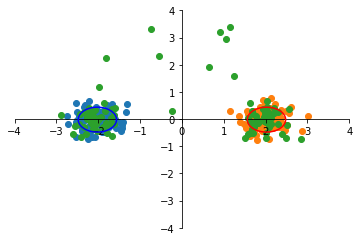

In [6]:
# define parameters
total_n = 300  # total number of samples = # class 1 + # class 2 + # sample class
cu = 0.1  # percentage of unknown unknonws in the test set
c = (1 - cu) / 2  # percentage of class 1 in the test set (= percentage of class 2 in the test set)

# define Gaussian distributions for class 1, 2 and unknown unknowns
mean_11, mean_12, mean_21, mean_22 = -2, 0, 2, 0
sigma_11, sigma_12, sigma_21, sigma_22 = 0.1, 0.1, 0.1, 0.1
mean_u1, mean_u2 = 0, 2
sigma_u1, sigma_u2 = 1, 1

# generate samples for class 1, class 2 and sample class
class1_x, class1_y = multivariate_normal([mean_11, mean_12], [[sigma_11, 0], [0, sigma_12]], 100).T
class2_x, class2_y = multivariate_normal([mean_21, mean_22], [[sigma_21, 0], [0, sigma_22]], 100).T
sample_x, sample_y = multivariate_normal([mean_u1, mean_u2], [[sigma_u1, 0], [0, sigma_u2]], int(100*cu)).T

s1_x, s1_y = multivariate_normal([mean_11, mean_12], [[sigma_11, 0], [0, sigma_12]], int(100*c)).T
s2_x, s2_y = multivariate_normal([mean_21, mean_22], [[sigma_21, 0], [0, sigma_22]], int(100*c)).T
sample_x, sample_y = np.concatenate((sample_x, s1_x)), np.concatenate((sample_y, s1_y))
sample_x, sample_y = np.concatenate((sample_x, s2_x)), np.concatenate((sample_y, s2_y))

# make plots
fig = plt.figure(1) 
ax = fig.add_subplot(111)

# set up axis 
ax.spines['left'].set_position('zero') 
ax.spines['right'].set_color('none') 
ax.spines['bottom'].set_position('zero') 
ax.spines['top'].set_color('none') 
ax.xaxis.set_ticks_position('bottom') 
ax.yaxis.set_ticks_position('left') 

# setup x and y ranges and precision
x1 = np.arange(-3.5, 3.5, 0.01) 
y1 = np.arange(-3.0, 3.5, 0.01)

x2 = np.arange(-3.5, 3.5, 0.01) 
y2 = np.arange(-3.0, 3.5, 0.01)

# draw the class distributions
ax.scatter(class1_x, class1_y)
ax.scatter(class2_x, class2_y)
ax.scatter(sample_x, sample_y)

# draw the decision boundary between class 1 and 2

# draw the decision boudary between class 1 and sample class
X1, Y1 = np.meshgrid(x1, y1)
F1 = (1-cu)/(2*sigma_21*sigma_22)*e**(-1/(2*sigma_21**2)*(X1-mean_21)**2-1/(2*sigma_22**2)*(Y1-mean_22)**2) \
    + cu/(sigma_u1*sigma_u2)*e**(-1/(2*sigma_u1**2)*(X1-mean_u1)**2-1/(2*sigma_u2**2)*(Y1-mean_u2)**2)
G1 = (1+cu)/(2*sigma_11*sigma_12)*e**(-1/(2*sigma_11**2)*(X1-mean_11)**2-1/(2*sigma_12**2)*(Y1-mean_12)**2)
ax.contour(X1, Y1, (F1-G1), [0], colors='blue', zorder=100)

# draw the decision boudary between class 2 and sample class
X2, Y2 = np.meshgrid(x2, y2)
F2 = (1-cu)/(2*sigma_11*sigma_12)*e**(-1/(2*sigma_11**2)*(X2-mean_11)**2-1/(2*sigma_12**2)*(Y2-mean_12)**2) \
    + cu/(sigma_u1*sigma_u2)*e**(-1/(2*sigma_u1**2)*(X2-mean_u1)**2-1/(2*sigma_u2**2)*(Y2-mean_u2)**2)
G2 = (1+cu)/(2*sigma_21*sigma_22)*e**(-1/(2*sigma_21**2)*(X2-mean_21)**2-1/(2*sigma_22**2)*(Y2-mean_22)**2)
ax.contour(X2, Y2, (F2-G2), [0], colors='red', zorder=100)

# set bounds 
ax.set_xbound(-4, 4)
ax.set_ybound(-4, 4) 

plt.show()